In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
def KMeans(data, n_clusters = 20, iterations = 30):
  means = np.random.choice(data.shape[0], n_clusters, replace=False)
  means = data[means]

  assignments = np.zeros(data.shape[0])
  for i in range(iterations):
    distance_matrix = np.sqrt( np.sum( (data[:, np.newaxis] - means[np.newaxis, :]) ** 2, axis=-1 ) )
    assignments = np.argmin(distance_matrix, axis=1)

    for k in range(n_clusters):
      points = np.where(assignments == k)[0]
      cluster_data = data[points]
      if len(cluster_data) > 0:
        means[k] = np.mean(cluster_data, axis=0)

  return assignments, means


In [3]:
def compress_image(image, n_clusters, iterations):
  image_flatten = image.reshape(image.shape[0] * image.shape[1], image.shape[2])
  assignments, means = KMeans(image_flatten, n_clusters, iterations)
  compressed_image = means[assignments.astype(int)].reshape(image.shape[0], image.shape[1], image.shape[2])
  compressed_image = np.clip(compressed_image, 0, 255).astype(np.uint8)
  return compressed_image

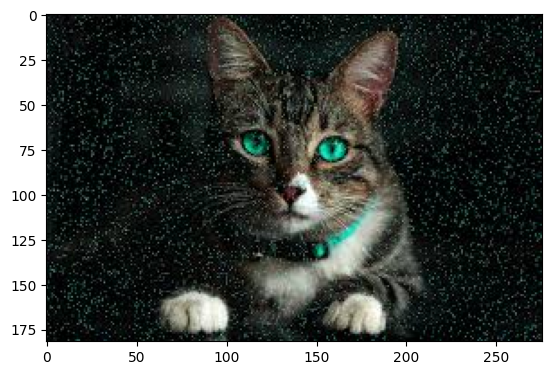

In [4]:
image = cv2.imread('/content/drive/MyDrive/DLL/Current/images.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [5]:
image_size_bytes = image.nbytes
image_size_kb = image_size_bytes / 1024
print(f"Image size before compression: {image_size_kb:.2f} KB")

Image size before compression: 147.16 KB


In [ ]:
compressed_image = compress_image(image, 5000, 30)
plt.imshow(compressed_image)

In [ ]:
image_size_bytes = compressed_image.nbytes
image_size_kb = image_size_bytes / 1024
print(f"Image size after compression: {image_size_kb:.2f} KB")

In [73]:
cv2.imwrite("compressed.jpg", compressed_image, [cv2.IMWRITE_JPEG_QUALITY, 50])
cv2.imwrite("original.jpg", image, [cv2.IMWRITE_JPEG_QUALITY, 50])

print("Original file size:", os.path.getsize("original.jpg") / 1024, "KB")
print("Compressed file size:", os.path.getsize("compressed.jpg") / 1024, "KB")

Original file size: 10.076171875 KB
Compressed file size: 11.375 KB
